## Summary => <br>
This notebook includes the following topics. <br>

* Descriptive Statistics
* Sample vs Population statistics
* Random Variables
* Probability Distribution Function
* Expected Value
* Binomial Distribution
* Normal Distributions
* z-score 
* Hypothesis Testing
* z-stats vs t-stats
* Type 1 Error; Type 2 Error
* Confidence Interval
* Central Limit Theorem
* Chi Square Test
* ANOVA Test
* F Stats
* Regressions (Linear, Multiple) + ROC
* Cluster Analysis
* CART Algorithms

In [1]:
import numpy as np
import pandas as pd 
import os
import random as rnd

In [2]:
import matplotlib.pyplot as plt

### 1. CART Algorithms

Brief Description -> 

##### Tools Used

Dataset Used -> Boston Dataset (UCI Machine Learning Repository)

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = boston_dataset.target

In [7]:
names = boston_dataset.feature_names

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
array = boston.values

X = array[:, 0:13]
Y = array[:, 13]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1234)

In [11]:
model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [12]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_leaf_nodes=20)

In [13]:
from sklearn.metrics import r2_score

In [14]:
YHat = model.predict(X_test)

In [15]:
r2 = r2_score(Y_test, YHat)
print("R2 Score -> ", r2)

R2 Score ->  0.8567122297482948


### plot the decision tree as a graph 

In [16]:
import graphviz
from sklearn import tree

method 1

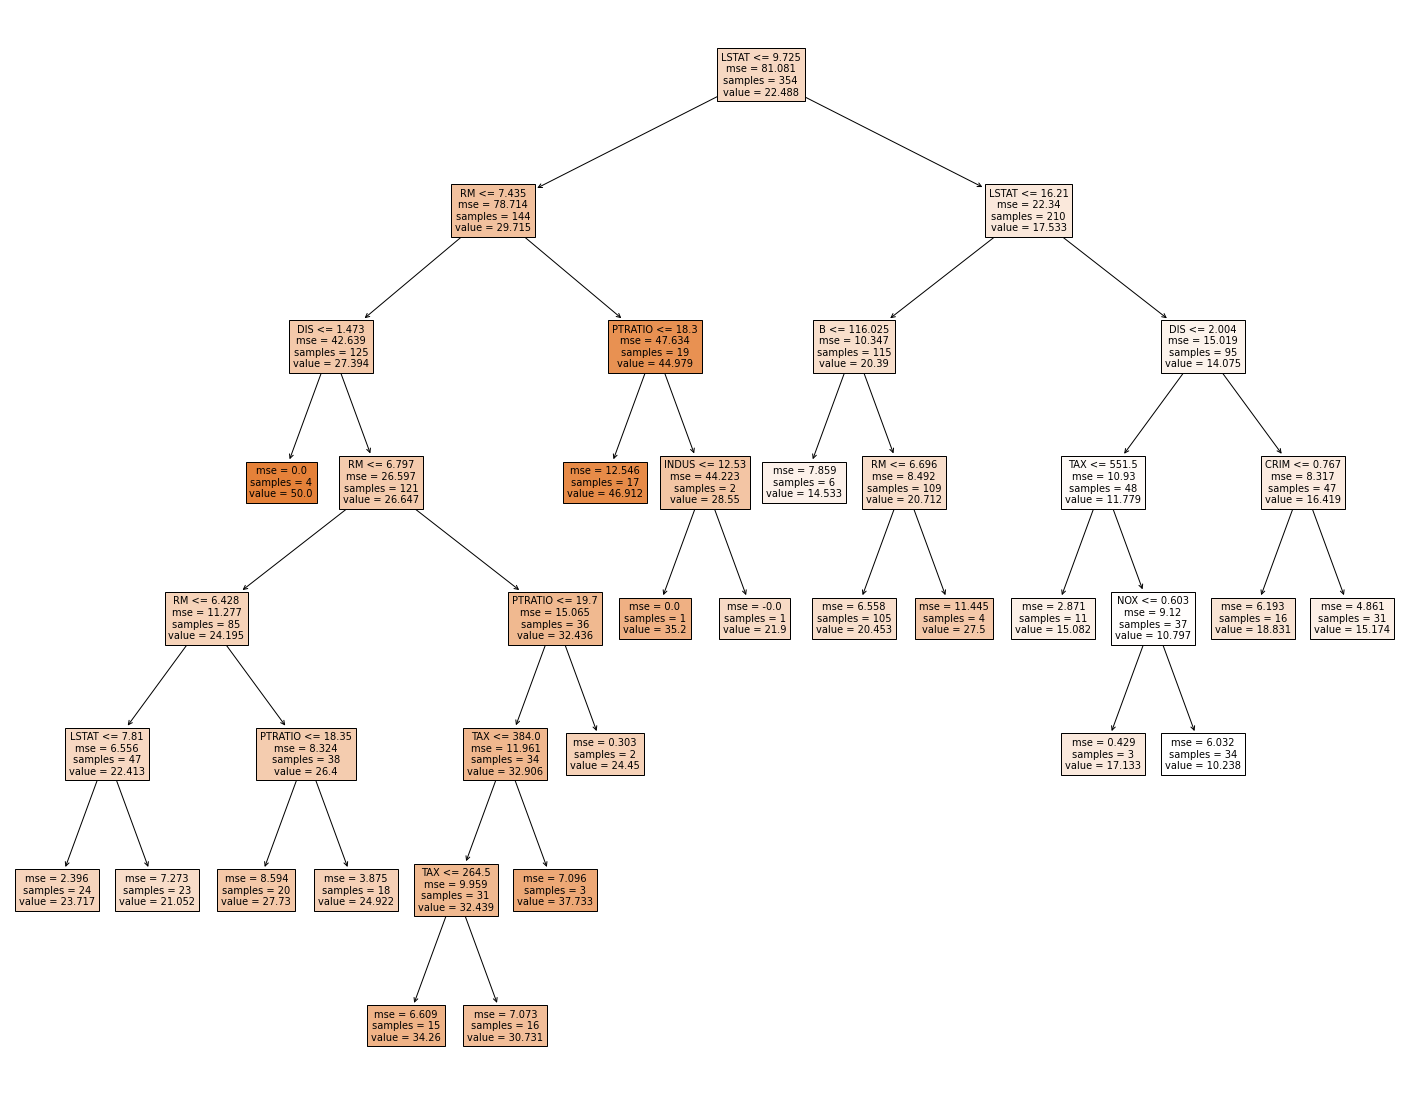

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=names,  
                   class_names=boston_dataset.target,
                   filled=True)

method 2

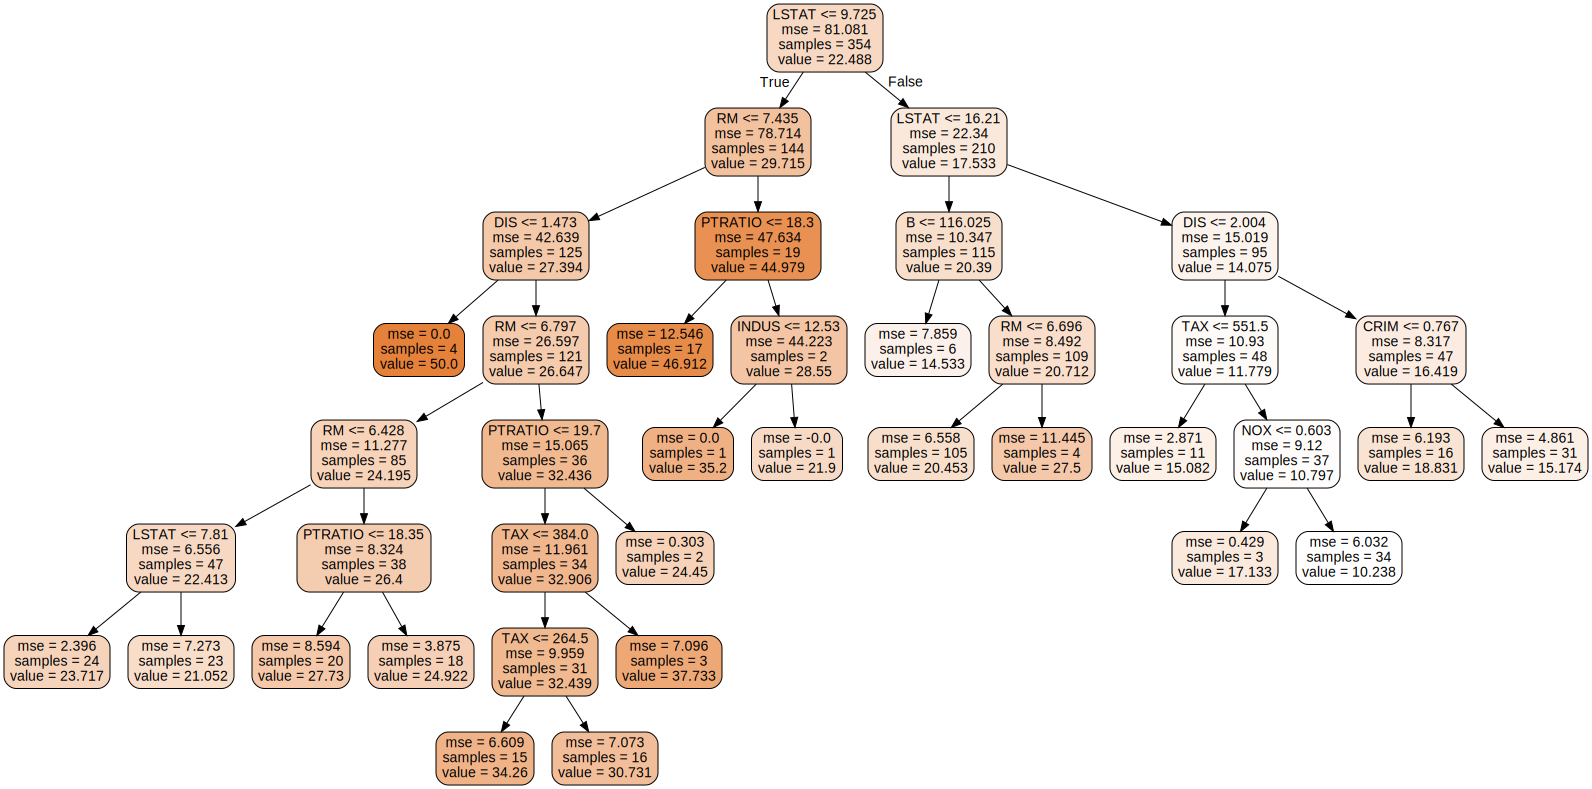

<Figure size 1440x1440 with 0 Axes>

In [18]:
plt.figure(figsize = (20,20))
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=names,  
                                class_names=boston_dataset.target,
                                filled=True, rounded= True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

We'll learn how to custom paint your graph from the default settings (coming soon)

In [19]:
"""import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        print(node.get_label())
        node.set_fillcolor('yellow')
        

graph.write_png('colored_tree.png')
"""

"import pydotplus\ngraph = pydotplus.graph_from_dot_data(dot_data)\nnodes = graph.get_node_list()\n\nfor node in nodes:\n    if node.get_label():\n        print(node.get_label())\n        node.set_fillcolor('yellow')\n        \n\ngraph.write_png('colored_tree.png')\n"

### 2. Regressions

Useful Resources -> <br>

* https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Lecture/lecture03_2020JC.html#1
* https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f#:~:text=%E2%80%9CA%20method%20of%20estimating%20the,observed%20data%20is%20most%20probable.%E2%80%9D&text=By%20assuming%20normality%2C%20we%20simply,the%20popular%20Gaussian%20bell%20curve.
* https://online.stat.psu.edu/stat462/node/207/
* https://psychscenehub.com/psychpedia/odds-ratio-2/
* http://statkat.com/stat-tests/logistic-regression.php#:~:text=Logistic%20regression%20analysis%20tests%20the,%3D%CE%B2K%3D0

1. Linear Regression Analysis

2. Multiple Regression Analysis

### 3. Chi Square Test

background -> 

degrees of freedom for the chi-squared distribution -> (rows -1) * (cols -1)

a. Understanding Contigency Tables (also known as crosstab)

Contigency tables are the pivot tables obtained by utilizing the categorical variable. The contigency here is whether a variable affects the values of the caegorical variable. <br>


b. Performing Chi-Square Tests

c. Chi-Square Tests for Feature Selection

![](https://media.geeksforgeeks.org/wp-content/uploads/Capture-214.png)

#### Note:- Used only for Categorical Features.

Dataset used -> https://www.kaggle.com/c/cat-in-the-dat

In [20]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 


data = pd.read_csv('../input/cat-in-the-dat/train.csv')

In [21]:
data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [22]:
data.drop(['id'], axis = 1, inplace = True)

In [23]:
data.dtypes

bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [24]:
for col in data.columns:
    print(col, data[col].nunique())

bin_0 2
bin_1 2
bin_2 2
bin_3 2
bin_4 2
nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1220
nom_8 2215
nom_9 11981
ord_0 3
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192
day 7
month 12
target 2


In [25]:
for col in data.columns:
    print(col, '\n\n',data[col].value_counts())
    print('-'*10)

bin_0 

 0    261749
1     38251
Name: bin_0, dtype: int64
----------
bin_1 

 0    223018
1     76982
Name: bin_1, dtype: int64
----------
bin_2 

 0    185033
1    114967
Name: bin_2, dtype: int64
----------
bin_3 

 T    153535
F    146465
Name: bin_3, dtype: int64
----------
bin_4 

 Y    191633
N    108367
Name: bin_4, dtype: int64
----------
nom_0 

 Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64
----------
nom_1 

 Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64
----------
nom_2 

 Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64
----------
nom_3 

 Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64
----------
nom_4 

 Oboe        92293
Piano       84517
Bassoon     68448
T

bin_3, bin_4 has T/F values. <br>
nom_0, nom_1, nom_2, nom_3, nom_4 have 3-6 unique values. <br>
nom_5, nom_6, nom_7, nom_8, nom_9 have many unique values <br>
THen comes the ordinal variables

In [26]:
data['bin_3'] = data['bin_3'].map({"T" : 1, "F" : 0})
data['bin_4'] = data['bin_4'].map({"Y" : 1, "N" : 0})

In [27]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


We're done with dealing of binary variables. <br>
Now we're left to deal with the nominals & ordinals.

We have 5 ordinal variables of which 4 have few unique values and can be dealt in a similar manner. <br>
ord_5 has multiple unique values and needs to be handled separately. 

In [28]:
for col in ['ord_1', 'ord_2', 'ord_3', 'ord_4']:
    print(col, list(np.unique(data[col])))

ord_1 ['Contributor', 'Expert', 'Grandmaster', 'Master', 'Novice']
ord_2 ['Boiling Hot', 'Cold', 'Freezing', 'Hot', 'Lava Hot', 'Warm']
ord_3 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
ord_4 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [29]:
m1_ord1 = {'Novice' : 0, 'Contributor' : 1, 'Expert' : 2, 'Master' : 3, 'Grandmaster' : 4}

data['ord_1'] = data['ord_1'].map(m1_ord1)

In [30]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,Freezing,a,R,qP,7,8,0


In [31]:
m2_ord2 = {'Boiling Hot' : 0, 'Cold' : 1, 'Freezing' : 2, 'Hot' : 3, 'Lava Hot' : 4, 'Warm' : 5}

data['ord_2'] = data['ord_2'].map(m2_ord2)

In [32]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,1,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,3,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,4,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,0,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,2,a,R,qP,7,8,0


In [33]:
data['ord_3'] = data['ord_3'].apply(lambda x : ord(x) - ord('a'))
data['ord_4'] = data['ord_4'].apply(lambda x : ord(x) - ord('A'))

In [34]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,1,7,3,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,3,0,0,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,4,7,17,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,0,8,3,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,2,0,17,qP,7,8,0


In [35]:
data['ord_5a'] = data['ord_5'].str[0]
data['ord_5b'] = data['ord_5'].str[1]

data['ord_5a'] = data['ord_5a'].map({val : idx for idx, val in enumerate(np.unique(data['ord_5a']))})
data['ord_5b'] = data['ord_5b'].map({val : idx for idx, val in enumerate(np.unique(data['ord_5b']))})

In [36]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,4,1,7,3,kr,2,2,0,36,43
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,4,3,0,0,bF,7,8,0,27,5
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,2,4,7,17,Jc,7,2,0,9,28
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,4,0,8,3,kW,2,1,1,36,22
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,4,2,0,17,qP,7,8,0,42,15


Let's deal the nominal variables.

In [37]:
data[['nom_0', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']]

,nom_0,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
0,Green,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,Green,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,Blue,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,Red,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,Red,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7
...,...,...,...,...,...,...,...,...,...
299995,Red,Snake,India,Oboe,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef
299996,Green,Lion,Russia,Piano,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8
299997,Blue,Axolotl,Russia,Oboe,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b
299998,Green,Axolotl,Costa Rica,Piano,e1558b071,0000ee65f,c8ae4ea14,1f820c7ce,ab0ce192b


In [38]:
data['nom_1'].value_counts()

Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64

In [39]:
data['nom_2'].value_counts()

Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64

In [40]:
data['nom_3'].value_counts()

Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64

In [41]:
data['nom_4'].value_counts()

Oboe        92293
Piano       84517
Bassoon     68448
Theremin    54742
Name: nom_4, dtype: int64

In [42]:
data['nom_5'].value_counts()

f7821e391    2801
06eeaf0aa    2750
472efea17    2729
20b10a832    2725
b97f51ac4    2717
             ... 
91c80026f      64
88f104c00      59
f802a9849      46
1fd0233cd      41
f710fca39      26
Name: nom_5, Length: 222, dtype: int64

In [43]:
data['nom_6'].value_counts()

d173ac7ca    1218
2ed5a94b0    1210
c9eedfbc2    1193
50d7ad46a    1175
0922e3cb8    1169
             ... 
26bf5ddd9      16
28630a5c8      12
8367b78fc      11
e97824431       8
4dcab4fc8       5
Name: nom_6, Length: 522, dtype: int64

In [44]:
data['nom_7'].value_counts()

3a114adea    534
3b679e531    518
6f3940b72    518
fcf2b8dce    517
fe27cc23d    515
            ... 
bc05442e1      3
446df0c98      3
f718e6e9c      3
74a1b69b1      2
3460d7c4b      1
Name: nom_7, Length: 1220, dtype: int64

In [45]:
data.drop(['ord_5', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis = 1, inplace = True)

In [46]:
"""data['day'] = data['day'] / 7.0

data['month'] = data['month'] / 12.0"""

"data['day'] = data['day'] / 7.0\n\ndata['month'] = data['month'] / 12.0"

In [47]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,2,4,1,7,3,2,2,0,36,43
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,1,4,3,0,0,7,8,0,27,5
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,1,2,4,7,17,7,2,0,9,28
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,1,4,0,8,3,2,1,1,36,22
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,1,4,2,0,17,7,8,0,42,15


Let's encode the remaining of the nominal values

In [48]:
data['nom_1'].value_counts()

Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64

In [49]:
m1_nom1 = {'Trapezoid' : 0, 'Square' : 1, 'Star' : 2, 'Circle' : 3, 'Polygon' : 4, 'Triangle' : 5}

data['nom_1'] = data['nom_1'].map(m1_nom1)

In [50]:
data['nom_2'].value_counts()

Lion       101295
Cat         49659
Snake       45979
Dog         37444
Axolotl     36136
Hamster     29487
Name: nom_2, dtype: int64

In [51]:
m2_nom2 = {'Lion' : 0, 'Cat' : 1, 'Snake' : 2, 'Dog' : 3, 'Axolotl' : 4, 'Hamster' : 5}
data['nom_2'] = data['nom_2'].map(m2_nom2)

In [52]:
data['nom_3'].value_counts()

Russia        101123
Canada         49951
China          46044
Finland        36942
Costa Rica     35988
India          29952
Name: nom_3, dtype: int64

In [53]:
m3_nom3 = {'Russia' : 0, 'Canada' : 1, 'China' : 2, 'Finland' : 3, 'Costa Rica' : 4, 'India' : 5}

data['nom_3'] = data['nom_3'].map(m3_nom3)

In [54]:
data['nom_4'].value_counts()

Oboe        92293
Piano       84517
Bassoon     68448
Theremin    54742
Name: nom_4, dtype: int64

In [55]:
m4_nom4 = {'Oboe' : 0, 'Piano' : 1, 'Bassoon' : 2, 'Theremin' : 3}

data['nom_4'] = data['nom_4'].map(m4_nom4)

In [56]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,Green,5,2,3,2,2,4,1,7,3,2,2,0,36,43
1,0,1,0,1,1,Green,0,5,0,1,1,4,3,0,0,7,8,0,27,5
2,0,0,0,0,1,Blue,0,0,0,3,1,2,4,7,17,7,2,0,9,28
3,0,1,0,0,1,Red,0,2,1,0,1,4,0,8,3,2,1,1,36,22
4,0,0,0,0,0,Red,0,0,1,0,1,4,2,0,17,7,8,0,42,15


In [57]:
data['nom_0'].value_counts()

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64

In [58]:
m0_nom0 = {'Green' : 0, 'Blue' : 1, 'Red' : 2}

data['nom_0'] = data['nom_0'].map(m0_nom0)

Perform One Hot Encoding of the ordinal features

Label Encoding multiple columns

In [59]:
df_copy = data.copy()
df_copy.drop(['target'], axis = 1, inplace = True)

In [60]:
df_copy = pd.get_dummies(df_copy, columns = df_copy.columns)
df_copy

,bin_0_0,bin_0_1,bin_1_0,bin_1_1,bin_2_0,bin_2_1,bin_3_0,bin_3_1,bin_4_0,bin_4_1,...,ord_5b_41,ord_5b_42,ord_5b_43,ord_5b_44,ord_5b_45,ord_5b_46,ord_5b_47,ord_5b_48,ord_5b_49,ord_5b_50
0,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
299996,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
299997,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
299998,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5a,ord_5b
0,0,0,0,1,1,0,5,2,3,2,2,4,1,7,3,2,2,0,36,43
1,0,1,0,1,1,0,0,5,0,1,1,4,3,0,0,7,8,0,27,5
2,0,0,0,0,1,1,0,0,0,3,1,2,4,7,17,7,2,0,9,28
3,0,1,0,0,1,2,0,2,1,0,1,4,0,8,3,2,1,1,36,22
4,0,0,0,0,0,2,0,0,1,0,1,4,2,0,17,7,8,0,42,15


In [62]:
#X = data.drop(['target'], axis = 1)
X = df_copy
y = data.target

In [63]:
# perform feature engineering to encode categorical variables so as to be processed by chi2_feature transform

In [64]:
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(X,y)

print("Original Number of Features -> (shape)", X.shape[1])

print("K Best Features (shape)-> ",X_kbest_features.shape[1])



Original Number of Features -> (shape) 212
K Best Features (shape)->  10


In [65]:
X_kbest_features

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

### 4. T-Test

t-test also known as Student's t-test compares the two averages (means) and tells you if they are different from each other. <br>
Can also tell you how significant the differences are. 

**t-score**

**T-Values vs P-Values**

Types of T-Test <br>
* Independent Samples t-test
* Paired Sample t-test
* One Sample t-test

### 5. Z-Test

### 6. ANOVA Test

ANOVA -> Analysis of Variance. <br>
Helps to compare the means of more than 2 groups. <br>
ANOVA F Test is also called omnibus test. <br><br><br>

Main types of ANOVA Test -> 
* One-way or One-factor 
* Two-way or Two-factor

ANOVA Hypotheses -> <br>
* Null Hypotheses = Group means are equal. No variation in the groups. 
* Alternative Hypothesis = At least, one group is different from other groups.

ANOVA Assumptions -> <br><br>
* Residuals(experimental error) are normally distributed.(Shapiro-Wilks Test)
* Homogenity of variances (variances are equal between treatment groups) (Levene's or Bartlett's Test)
* Observations are sampled independently from each other. 

ANOVA Working -> <br><br>
* Check sample sizes, i.e., Equal number of observations in each group. 
* Calculate Mean Square for each group (MS) (SS of group/degrees of freedom-1)
* Calc Mean Sq. Error (SS Error / df of residuals)
* Calc F value (MS of group / MSE)

#### 6.1 One-Way ANOVA Test

In [66]:
import random

In [67]:
df = pd.DataFrame([random.sample(range(1, 1000), 4) , random.sample(range(1, 1000), 4), random.sample(range(1, 1000), 4), random.sample(range(1, 1000), 4)], columns = ['A', 'B', 'C', "D"])

In [68]:
df

,A,B,C,D
0,729,320,63,104
1,959,155,794,59
2,268,988,636,655
3,167,782,235,854


##### Interpretation

p-value obtained from ANOVA Analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences amongst the groups. 

#### 6.2 Two-Way ANOVA Test

In Two-Way ANOVA Test, we have 2 independent variables and their different levels

### 7. F Stats Test

### 8. Binomial Distribution

### 9. Normal Distribution

### 10. Central Limit Theorem

**What it states?** <br><br>
Even when a sample is not normally distributed, if you draw multiple samples and take each of their averages, the averages will represent a normal distribution.<br><br>
Which means repeated sampling from a not normally distributed sample and taking the means of those repeated samples will end up being a normally distributed sample. <br><br>

100 samples in total which are not normally distributed. Take random 10 samples say 50 times and take the mean of these samples. It will come out to be a normally distributed sample.

The following is an experiment of dice roll for 1000 times. <br>
for 1000 times, we make samples of samples size 100 where possible outcomes are 1,2,3,4,5,6 <br><br>
By plotting the histogram of the sample means, we obtain a normally distributed plot. <br>
This is Central Limit Theorem

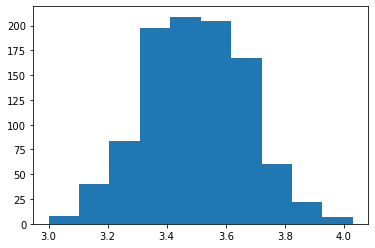

In [69]:

means = [np.mean(np.random.randint(1, 7, 100)) for _ in range(1000)]

plt.hist(means)
plt.show()

##### Key Takeaways :- <br><br>

![](https://miro.medium.com/max/366/1*RdIQG331j0tayi50asTOIw.png)

![](https://miro.medium.com/max/418/1*dCxzo7E6lmKxHLEg2xZSoQ.png)

You can never experiment with all your customers (population). However, to draw a conclusion for an experiment which is a good representaion of your customers, you need to perform repeated experiments on different set of customers (different samples of the not normally distributed population/sample as per the context) and confirm your hypotheses. 

### 11. Sample Statistics

### 12. Population Statistics

### Notebook in Making.  <br>
Est. Date of Completion - 28-03-2021